In [1]:
import pandas as pd
from urllib.request import urlopen
import datetime as dt                
from bs4 import BeautifulSoup
import json

In [2]:
def date_format_K(d):                     
    d = str(d).replace('-', '.') 
    yyyy = int(d.split('.')[0])  
    mm = int(d.split('.')[1])    
    dd = int(d.split('.')[2])           
    
    this_date = dt.date(yyyy, mm, dd)  
    return this_date

In [3]:
def historical_index_naver(index_cd, start_date='', end_date='', page_n=1, last_page=0):
    
    # 파라미터로는 
    # index_cd (코드명. ex, 코스피, 코스피200 ..) 
    # start_date(원하는 기간의 시작일), end_date(종료일) 날짜를 문자열로 넣는다
    # page_n =1   항상 1페이지 부터 시작한다
    # last_page = 0  마지막페이지는 아직 몇인지 모르니 우선 0으로 놓는다
    
    if start_date:                                   # 만약 start_date를 정의해줬으면
        start_date = date_format_K(start_date)        # start_date를 위에서 만든 date_format함수로 원하는 형태로 바꿔주자
    else:
        start_date = dt.date.today()                # 만약 start_date를 정의해주지 않았다면 오늘 날짜로 정의
    
    if end_date:                                    # 만약 end_date를 정의해줬으면
        end_date = date_format_K(end_date)            # end_date를 위에서 만든 date_format함수로 원하는 형태로 바꿔주자
    else:
        end_date = dt.date.today()                  # 만약 end_date를 정의해주지 않았다면 오늘 날짜로 정의
        
        
    # 코스피200 일별시세 url 소스코드를 가져오기
        
    naver_index = r'https://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + r'&page=' + str(page_n)
    source = urlopen(naver_index).read()
    source = BeautifulSoup(source, 'lxml')
    
    dates = source.find_all('td', class_ = 'date')          # 날짜수집
    prices = source.find_all('td', class_ = 'number_1')     # 지수수집
    
    
    
    for n in range(len(dates)): # 특정페이지에서 6개의 날짜가 출력됨. 6개의 날짜데이터 모두 코르블록 실행
        
        if dates[n].text.split('.')[0].isdigit():  # 만약 n번째 페이지의 날짜데이터의 첫번째 인덱스가 숫자라면 코드블록 실행
                                                   # (날짜데이터가 맞는지 확인하는?)
        
            # 날짜 처리를 처리
            
            this_date = dates[n].text              # n번째 태그에서 날짜인 text만 가져오기
            this_date = date_format_K(this_date)     # 위에서 정의해준 date_format함수로 원하는 형태로 날짜 만들어주기
            
            # 만약 this_date가 정의해줄 end_date보다 작거나 같고 start_date보다 크거나 같으면 코드블록 실행
            # 즉 end_date와 start_date 사이의 날짜들에 대해서만 코드 실행
            
            if this_date <= end_date and this_date >=start_date:  
                
            # 종가 처리
                this_close = prices[n*4].text            #종가는 ('td', class_='number_1')을 가진 소스들의 5번째에 옴
                                                         # 그러므르 인덱스는 4의 배수(4*n)이 필요

                this_close = this_close.replace(',', '')  # 숫자의 천 단위마다 있는 ,를 빼준다.
                this_close = float(this_close)            # 그후 실수타입으로 바꿔줌

            # 딕셔너리에 저장
                historical_prices[this_date] = this_close # 날짜:종가 형태가 나올 수 있도록 dict에 저장
            
            elif this_date < start_date:                  
                return historical_prices
            
    # 페이지 내비게이션 / 일별시세의 마지막 페이지가 몇인지 알기위함
    if last_page == 0:                          
        last_page = source.find('td', class_ = 'pgRR').find('a')['href']
        last_page = last_page.split('&')[1]
        last_page = int(last_page.split('=')[1])
    
    # 다음페이지 호출
    if page_n <= last_page: #페이지가 마지막 페이지까지 돌 수 있도록 하기
        page_n += 1        #페이지는 하나씩 올라가야함
        historical_index_naver(index_cd, start_date, end_date, page_n, last_page)
        
        # 만약 마지막 페이지가 5라고 하면
        # 우리가 정의해준 함수 historical_index_naver는
        # historical_index_naver(index_cd, start_date, end_date, 1, 5)
        # historical_index_naver(index_cd, start_date, end_date, 2, 5) ... 이런식으로 page_n가 5가 될때까지 실행
    
    return historical_prices # 반환은 dict 타입인 historical_prices로 한다

index_cd = 'KPI200'
historical_prices = dict()
historical_index_naver(index_cd, '2018-3-1', '2018-4-4')
historical_prices

{datetime.date(2018, 4, 4): 308.54,
 datetime.date(2018, 4, 3): 313.38,
 datetime.date(2018, 4, 2): 314.0,
 datetime.date(2018, 3, 30): 314.61,
 datetime.date(2018, 3, 29): 313.82,
 datetime.date(2018, 3, 28): 311.81,
 datetime.date(2018, 3, 27): 316.34,
 datetime.date(2018, 3, 26): 314.89,
 datetime.date(2018, 3, 23): 312.42,
 datetime.date(2018, 3, 22): 323.32,
 datetime.date(2018, 3, 21): 321.6,
 datetime.date(2018, 3, 20): 321.79,
 datetime.date(2018, 3, 19): 320.35,
 datetime.date(2018, 3, 16): 322.88,
 datetime.date(2018, 3, 15): 322.74,
 datetime.date(2018, 3, 14): 321.99,
 datetime.date(2018, 3, 13): 322.98,
 datetime.date(2018, 3, 12): 320.7,
 datetime.date(2018, 3, 9): 317.67,
 datetime.date(2018, 3, 8): 314.78,
 datetime.date(2018, 3, 7): 311.14,
 datetime.date(2018, 3, 6): 310.46,
 datetime.date(2018, 3, 5): 304.58,
 datetime.date(2018, 3, 2): 308.35}

In [4]:
def date_format(d=''):
    if d != '':
        this_date = pd.to_datetime(d).date()
    else:
        this_date = pd.Timestamp.today().date()
    return(this_date)

In [5]:
def index_global(d, symbol, start_date='', end_date='', page = 1):
    
    end_date = date_format(end_date)
    # 크롤링하고자하는 마지막날짜를 위에서 정의 해주준 date_format함수로
    # 날짜형식으로 바꿔준다.
    # 위의 함수에서 설명했듯이 end_date가 빈문자열이라면 자동적으로 오늘 날짜가 된다.
    
    if start_date == '':
        start_date = end_date - pd.DateOffset(months = 1)
    # 그리고 만약 start_date가 빈문자열이라면, 즉, 따로 정의해주지 않았다면
    # end_date에서 한달을 빼서 정의해준다
    # (ex, end_date가 2020.05.11 이라면 start_date는 2020.04.11가 자동으로 된다.)
        
    start_date = date_format(start_date)
    # 정의해주었든 한달전으로 받았든 date_format함수로 날짜형식으로 바꿔준다.
    # date_format에 빈문자열이 들어가면 자동적으로 오늘날짜가 되지만
    # start_date는 정해진든 한달전으로 가든 해서 빈문자열일 일이 없다.
    
    # 여기까지가 start_date 와 end_date를 정의해주는 코딩.
    
    url = 'https://finance.naver.com/world/worldDayListJson.nhn?symbol=' + symbol + '&fdtc=0&page=' + str(page) 
    raw = urlopen(url)
    data = json.load(raw)
    # url을 가져와 페이지의 소스를 가져오자.
    
    
    if len(data) > 0:
    # 사실 이 부분이 구지 필요한가 싶은게 어짜피 마지막페이지를 넘어가지 않는이상
    # 각페이지에 데이터가 0개가 될 일이 없다..
    # 아무튼 해당 페이지에 데이터가 존재한다면 정도로 말할 수 있을 듯
    
        for n in range(len(data)):
            date = pd.to_datetime(data[n]['xymd']).date() # 위에서 설명함

            # 페이지의 데이터가 우리가 정해준 start_date와 end_date사이에 있다면
            # (start_date 와 end_date 포함)
            if date >= start_date and date <= end_date:
                price = float(data[n]['clos'])
                #종가를 실수형으로 price에 넣고
                d[date] = price
                # dict d에 날짜 : price 로 key와 value를 만들어준다.
                
            elif date < start_date:
            # 만약 페이지를 넘어가다가 date가 start_date보다 작아진다면
                return(d)
                # d를 받으면서 마무리.
       
        if len(data) == 10: # 이것도 위에서 설명함.
      
            page += 1
            index_global(d, symbol, start_date, end_date, page)
            # 여기서 page는 1씩 올라가기 때문에 page = 1 이 아니라 page로 와야한다.
        
    return (d) # 전페이지를 돌고 dict d를 받는다.

In [6]:
idex_cd = 'KPI200'
historical_prices = dict()
kospi200 = historical_index_naver(index_cd, '2008-1-2', '2019-12-30')

In [7]:
index_cd = 'SPI@SPX'
historical_prices = dict()
sp500 = index_global(historical_prices, index_cd, '2008-1-1', '2019-12-31')

In [8]:
tmp = {'S&P500':sp500, 'KOSPI200':kospi200}
tmp

{'S&P500': {datetime.date(2019, 12, 31): 3230.78,
  datetime.date(2019, 12, 30): 3221.29,
  datetime.date(2019, 12, 27): 3240.02,
  datetime.date(2019, 12, 26): 3239.91,
  datetime.date(2019, 12, 24): 3223.38,
  datetime.date(2019, 12, 23): 3224.01,
  datetime.date(2019, 12, 20): 3221.22,
  datetime.date(2019, 12, 19): 3205.37,
  datetime.date(2019, 12, 18): 3191.14,
  datetime.date(2019, 12, 17): 3192.52,
  datetime.date(2019, 12, 16): 3191.45,
  datetime.date(2019, 12, 13): 3168.8,
  datetime.date(2019, 12, 12): 3168.57,
  datetime.date(2019, 12, 11): 3141.63,
  datetime.date(2019, 12, 10): 3132.52,
  datetime.date(2019, 12, 9): 3135.96,
  datetime.date(2019, 12, 6): 3145.91,
  datetime.date(2019, 12, 5): 3117.43,
  datetime.date(2019, 12, 4): 3112.76,
  datetime.date(2019, 12, 3): 3093.2,
  datetime.date(2019, 12, 2): 3113.87,
  datetime.date(2019, 11, 29): 3140.98,
  datetime.date(2019, 11, 27): 3153.63,
  datetime.date(2019, 11, 26): 3140.52,
  datetime.date(2019, 11, 25): 3133.64

In [9]:
df = pd.DataFrame(tmp)
df.sort_index(inplace=True)
df

,S&P500,KOSPI200
2008-01-02,1447.16,235.30
2008-01-03,1447.16,234.67
2008-01-04,1411.63,235.77
2008-01-07,1416.18,231.00
2008-01-08,1390.19,230.34
...,...,...
2019-12-24,3223.38,292.90
2019-12-26,3239.91,294.06
2019-12-27,3240.02,295.20
2019-12-30,3221.29,293.77


In [10]:
df = df.fillna(method = 'ffill')
if df.isnull().values.any():
    df = df.fillna(method = 'bfill')
    
df

,S&P500,KOSPI200
2008-01-02,1447.16,235.30
2008-01-03,1447.16,234.67
2008-01-04,1411.63,235.77
2008-01-07,1416.18,231.00
2008-01-08,1390.19,230.34
...,...,...
2019-12-24,3223.38,292.90
2019-12-26,3239.91,294.06
2019-12-27,3240.02,295.20
2019-12-30,3221.29,293.77


In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.plot(df['S&P500'])
plt.plot(df['KOSPI200'])
plt.xticks(color = 'r', fontsize = 15)
plt.yticks(color = 'r', fontsize = 15)
plt.legend(loc = 0)
plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)

C:\Users\jylee\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


In [12]:
df.iloc[0]

S&P500      1447.16
KOSPI200     235.30
Name: 2008-01-02, dtype: float64

In [13]:
df.loc[dt.date(2008,1 , 2)]

S&P500      1447.16
KOSPI200     235.30
Name: 2008-01-02, dtype: float64

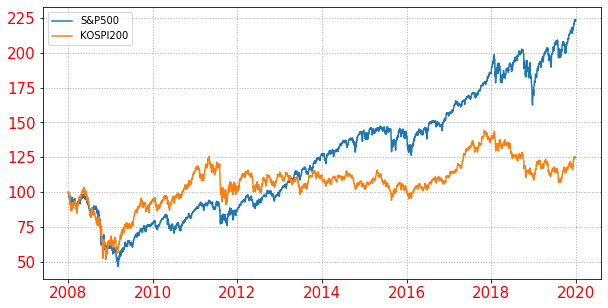

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.plot(df['S&P500'] / df['S&P500'].iloc[0] * 100)
plt.plot(df['KOSPI200'] / df['KOSPI200'].iloc[0] * 100)
plt.legend(['S&P500', 'KOSPI200']) # 범주표시
plt.xticks(color = 'r', fontsize = 15)
plt.yticks(color = 'r', fontsize = 15)
plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)

In [15]:
df_ratio_2016_now = df.loc[dt.date(2016, 1, 1): dt.date(2017, 12, 31)] / df.loc[dt.date(2016, 1, 4)] * 100
df_ratio_2016_now.head(3)

,S&P500,KOSPI200
2016-01-04,100.000000,100.000000
2016-01-05,100.201226,100.639304
2016-01-06,98.887045,99.987214


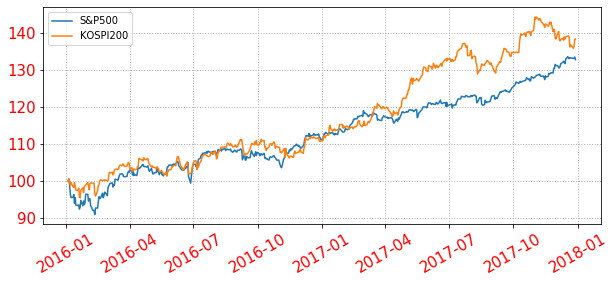

In [16]:
plt.figure(figsize = (10, 4))
plt.plot(df_ratio_2016_now['S&P500'])
plt.plot(df_ratio_2016_now['KOSPI200'])
plt.legend(['S&P500', 'KOSPI200']) # 범주표시
plt.xticks(color = 'r', fontsize = 15, rotation = 30)
plt.yticks(color = 'r', fontsize = 15)
plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)

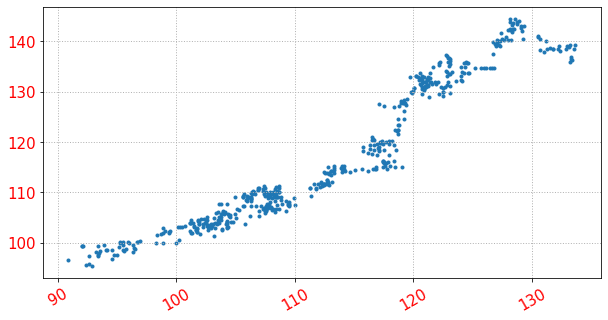

In [17]:
plt.figure(figsize = (10, 5))
plt.scatter(df_ratio_2016_now['S&P500'], df_ratio_2016_now['KOSPI200'], marker = '.')
plt.xticks(color = 'r', fontsize = 15, rotation = 30)
plt.yticks(color = 'r', fontsize = 15)
plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = df_ratio_2016_now['S&P500']
y = df_ratio_2016_now['KOSPI200']

independent_var = np.array(x).reshape(-1, 1)
dependent_var = np.array(y).reshape(-1, 1)

# Linear Regression
regr = LinearRegression()
regr.fit(independent_var, dependent_var)

regr.coef_, regr.intercept_

(array([[1.28808895]]), array([-28.22570265]))

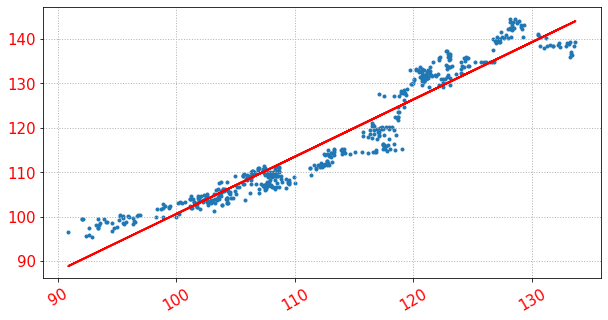

In [19]:
plt.figure(figsize = (10, 5))
plt.scatter(df_ratio_2016_now['S&P500'], df_ratio_2016_now['KOSPI200'], marker = '.')
plt.plot(independent_var, regr.predict(independent_var), color = 'r', linewidth = 2)
plt.xticks(color = 'r', fontsize = 15, rotation = 30)
plt.yticks(color = 'r', fontsize = 15)
plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)